In [1]:
# !pip install matplotlib
# !pip install seaborn
!pip freeze

aiohttp==3.9.1
aiosignal==1.3.1
alembic==1.13.1
anyio==4.2.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
asttokens==2.4.1
async-generator==1.10
async-timeout==4.0.3
attrs==23.2.0
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==4.1.0
bqplot==0.12.42
Brotli==1.0.9
certifi==2024.2.2
certipy==0.1.3
cffi==1.16.0
charset-normalizer==3.3.2
click==8.1.7
cloudpickle==1.6.0
comm==0.2.1
conda==4.11.0
conda-package-handling==2.2.0
conda-package-streaming==0.9.0
configparser==6.0.1
contourpy==1.1.1
cryptography==39.0.1
cycler==0.12.1
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.1
Flask==2.2.5
fonttools==4.49.0
frozenlist==1.4.1
greenlet==3.0.3
idna==3.6
importlib-metadata==7.0.1
importlib-resources==6.3.0
ipykernel==5.5.5
ipython==8.12.3
ipython-genutils==0.2.0
ipywidgets==8.1.1
itsdangerous==2.1.2
jedi==0.19.1
Jinja2==3.1.3
joblib==1.3.2
json5==0.9.14
jsonschema==4.19.0
jsonschema-specifications==2023.12.1
jupyter-

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
from sklearn.metrics import recall_score
import os

In [2]:
df=pd.read_csv("/data/HR_comma_sep 1.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
display(df.isnull().any())

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [5]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

AttributeError: module 'seaborn' has no attribute 'histplot'

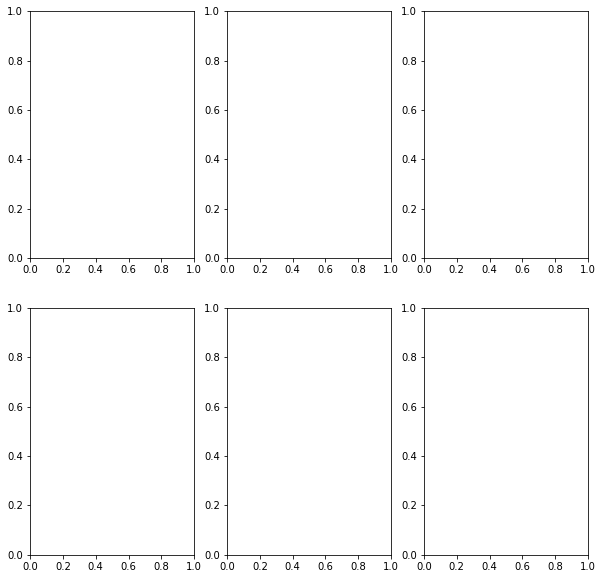

In [7]:
fig,ax = plt.subplots(2,3, figsize=(10,10))               # 'ax' has references to all the four axes
sns.histplot(df['satisfaction_level'], ax = ax[0,0]) 
sns.histplot(df['last_evaluation'], ax = ax[0,1]) 
sns.histplot(df['number_project'], ax = ax[0,2]) 
sns.histplot(df['average_montly_hours'], ax = ax[1,0]) 
sns.histplot(df['time_spend_company'], ax = ax[1,1]) 
sns.histplot(df['promotion_last_5years'], ax = ax[1,2])
plt.show()

In [8]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='left',data=df)
plt.show()

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 1080x504 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='Department',data=df)
plt.show()

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 1080x504 with 0 Axes>

In [10]:
fig = plt.figure(figsize=(15,7))
sns.barplot(x='Department',y='left',data=df)
plt.show()

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 1080x504 with 0 Axes>

In [11]:
df.salary=df.salary.astype('category')
df.salary=df.salary.cat.reorder_categories(["low", "medium", "high"])
df.salary=df.salary.cat.codes

# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(df.Department)
# Take a quick look to the first 5 rows of the new DataFrame called departments
print(departments.head(5))

      IT  RandD  accounting     hr  management  marketing  product_mng  sales  \
0  False  False       False  False       False      False        False   True   
1  False  False       False  False       False      False        False   True   
2  False  False       False  False       False      False        False   True   
3  False  False       False  False       False      False        False   True   
4  False  False       False  False       False      False        False   True   

   support  technical  
0    False      False  
1    False      False  
2    False      False  
3    False      False  
4    False      False  


In [12]:
departments = departments.drop("accounting", axis=1)
df = df.drop("Department", axis=1)
df = df.join(departments)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [13]:
n_employees = len(df)

# Print the number of employees who left/stayed
print(df.left.value_counts())

# Print the percentage of employees who left/stayed
print(df.left.value_counts()/n_employees*100)

left
0    11428
1     3571
Name: count, dtype: int64
left
0    76.191746
1    23.808254
Name: count, dtype: float64


In [14]:
fig = plt.figure(figsize=(15,7))
cor_mat=df.corr()
sns.heatmap(cor_mat)
plt.show()

/packages/Python-3.8/1a4b03ee-9983-4fbe-88e1-4a334d28fcf3/3.8/seaborn/matrix.py:71: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros(data.shape, np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 1080x504 with 0 Axes>

In [15]:
target=df.left
features=df.drop('left',axis=1)


target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(features_train, target_train)
model.score(features_train,target_train)*100
model.score(features_test,target_test)*100

97.22666666666666

In [16]:
first_rec = features_train.iloc[0]
fd = first_rec.to_json()
import json

df = pd.json_normalize(json.loads(fd)) 
# print(pd.read_json(df, orient='index'))
# #model.predict(fd)

prediction = model.predict(df)

In [17]:
from refractml import *

@scoring_func
def score(model, request):
    return model.predict(pd.json_normalize(request.json['payload']))[0]

/opt/conda/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [18]:
import requests
req = requests.Request()
req.json = {"payload":json.loads(fd)}
score(model,req)

1

In [19]:
from refractml.constants import MLModelFlavours
y_true= target_test
y_pred = model.predict(features_test)
prob = model.predict_proba(features_test)

In [20]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.24.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /packages/Python-3.8/1a4b03ee-9983-4fbe-88e1-4a334d28fcf3/3.8
Requires: joblib, scipy, numpy, threadpoolctl
Required-by: mosaic-utils


In [23]:
%%capture myout
register_model(
    model,
    score,
    "employee_churn_model_14Mar",
    "This model is used to predict the salary category of the empolyee",
    MLModelFlavours.sklearn,
    init_script="mkdir abc \\n cd abc \\n touch abc.txt",
    y_true=target_test,
    y_pred=model.predict(features_test),
    prob=prob,
    input_type="json",
    model_type = "classification",
    x_train=features_train, 
    y_train=target_train, 
    x_test=features_test, 
    y_test=target_test)